Σημείωσεις: Η διαδικασία της εκπαίδευσης απο τον k-NN classifier ακόμα πήρε πολλές ώρες, σε σημείο που δεν είχα το κουράγιο να πατήσω ξανά το run (λες και έγω εκπαίδευα το μοντέλο :') ). Όπως και να έχει debug δεν έγινε λόγω του περιορισμένου χρόνου κυρίως οπότε είναι μάλλον αρκετά λάθος. Ελπίζω να μην σας βγουν τα μάτια..

In [ ]:
import numpy as np
import pandas as pd
from IPython.display import Markdown

# 1. Εισαγωγή δεδομένων και προεργασία

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')
!unzip gdrive/MyDrive/ML\ Data/YearPredictionMSD_short.zip #gdrive/MyDrive/ΑρχείαΜαθημάτων/ΑρχείαΕργασιών/YearPredictionMSD.zip

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Archive:  gdrive/MyDrive/ML Data/YearPredictionMSD_short.zip
  inflating: YearPredictionMSD_short.csv  


In [ ]:
read_file = pd.read_csv('/content/YearPredictionMSD_short.csv')

##Απάντηση 1ου ερωτήματος

The target variable values that are present in the data set are [1922 - 2010]
[(2007, 3781), (2006, 3572), (2008, 3429), (2005, 3407), (2004, 3182), (2002, 2682), (2003, 2461), (2009, 2390), (2001, 2086), (1999, 2016), (2000, 2015), (1998, 1613), (1997, 1537), (1996, 1349), (1995, 1339), (1994, 1161), (1993, 1097), (1992, 940), (2010, 766), (1990, 751), (1991, 751), (1988, 622), (1987, 567), (1989, 567), (1986, 377), (1984, 324), (1985, 304), (1982, 303), (1973, 301), (1979, 295), (1975, 274), (1977, 274), (1980, 274), (1976, 261), (1981, 259), (1983, 243), (1974, 234), (1972, 231), (1970, 225), (1978, 193), (1971, 190), (1969, 172), (1964, 154), (1967, 131), (1968, 116), (1965, 100), (1966, 99), (1963, 90), (1961, 84), (1959, 63), (1956, 52), (1962, 46), (1958, 40), (1957, 39), (1960, 37), (1955, 25), (1954, 19), (1952, 14), (1935, 8), (1937, 8), (1949, 8), (1926, 6), (1945, 6), (1928, 5), (1941, 5), (1948, 5), (1950, 5), (1951, 5), (1922, 4), (1932, 4), (1936, 4), (1938, 4), (1942, 4

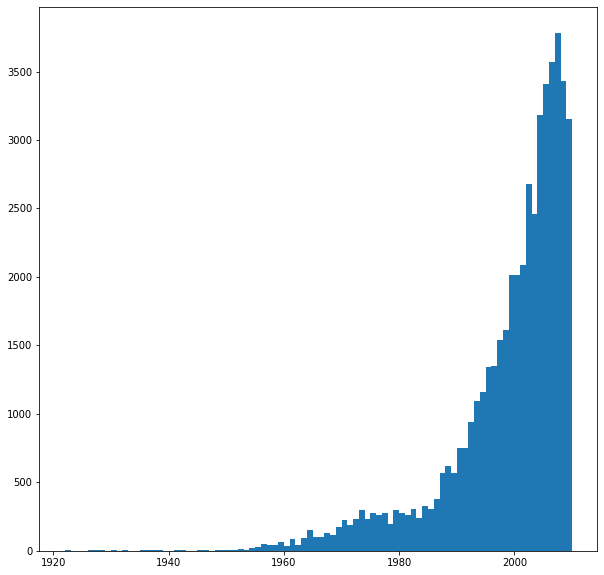

In [ ]:
import matplotlib.pyplot as plt

list1 = read_file.iloc[:, 0].tolist()

def minmax(alist, flag):
    min_value = min(alist)
    max_value = max(alist)

    if flag:
        print(f"The target variable values that are present in the data set are [{min_value} - {max_value}]")
    else: 
        print(f"The independent variable values that are present in the data set are [{min_value} - {max_value}]")

minmax(list1, 1)


#Not a pythonista.... yet, did it the old, plain, boring (in all capital)manly way not in the sugarboy python one.
def counterElem(alist):

    locDic = {}
    for j in alist:
        if j in locDic:
            locDic[j] += 1
        else:
            locDic[j] = 1

    return locDic


print(sorted(counterElem(list1).items(),key = lambda x:x[1], reverse = True))

plt.figure(figsize = (10, 10))
plt.hist(list1, bins = 88)
plt.show()

print("\n")

In [ ]:
list2 = read_file.iloc[:, 1:]

minmax(list2, 0)

The independent variable values that are present in the data set are [-0.36909 - 87.42967]


Το φάσμα τιμών απο όσο φαίνεται παραπάνω είναι αρκετά μεγάλο για να δικαιολογήσει την χρήση scalling. Γενικότερα όπως έχουμε δει δεν είναι (σχεδόν) ποτέ κακό να εφαρμόζει κανείς scalling, πόσο μάλλον όπως στην προκειμένη εφαρμογή που ένας απο τους αλγορίθμους που θα χρειαστούμε (k-NN) είναι αρκετά ευαίσθητος στα διάφορα μεγέθοι.

Το πρόβλημα πιστευώ θα ήταν καλύτερο να αντιμετωπιστεί ως ένα της ταξινόμησης καθώς θέλουμε απο το μοντέλο μας να προβλέψει διακριτές τιμές-κλάσεις που είναι οι χρονίες. Δεν θεωρώ οτι θα ήταν σωστή η προσέγγιση της χρονίας σαν μια συνεχή τιμή..

# 2. Συνάρτηση αξιολόγησης

In [ ]:
def evalMeasurment(ground_truth, predictions, N):

    percentage = 0.0
    counter = 0
    for i in predictions:
        if i - ground_truth[i] <= N:
            counter += 1 

    percentage = counter/len(predictions)
    return percentage

##Διαχωρισμός Test-Train και Standardization

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

X = read_file.iloc[:, 1:]
y = read_file.iloc[:, 0]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 40000)


#lab = preprocessing.LabelEncoder()
#y_train = lab.fit_transform(y)


scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


print(X.shape)
print(y.shape)

(50020, 90)
(50020,)


# 3. Ταξινόμηση

##k-Nearest Neighbors classification

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

knn_pipeline = Pipeline([('Scaler',  StandardScaler()),
            ('kNNClassifier', KNeighborsClassifier())])


params = {
            'kNNClassifier__n_neighbors':   range(1,8),
            'kNNClassifier__weights':   ['uniform', 'weighted']
        }

grid = GridSearchCV(estimator=knn_pipeline, cv = 3, param_grid=params, verbose=3)

grid.fit(X_train, y_train)
y_train_pred = grid.predict(X_train)
y_test_pred = grid.predict(X_test)


display(Markdown(
    "### Αποτελέσματα k-nearest neighbors classification:\n" +
    "**Best k**: {:.3f}".format(grid.best_params_['kNNClassifier__n_neighbors'])  + "<br>" +
    "**Best weighting**: {}".format(grid.best_params_['kNNClassifier__weights'])  + "<br>" +
    "**Best Cross-Val Accuracy**: {:.2f}".format(grid.best_score_) + "<br>" +
    "**Test Set Accuracy**: {:.2f}".format(accuracy_score(y_test, y_test_pred)) + "<br>" +
    "**Test Set F1**: {:.2f}".format(f1_score(y_test, y_test_pred,average='micro')) + "<br>" +
    "**Test Set Self Measurment for N = 3**: {:.2f}".format(evalMeasurment(y, y_test_pred, 3)) + "<br>" +
     "**Test Set Self Measurment for N = 5**: {:.2f}".format(evalMeasurment(y, y_test_pred, 5)) + "<br>" +
    "**Confusion matrix**:"
))


print("\n".join([' '.join(['{:4}'.format(item) for item in row]) 
      for row in confusion_matrix(y_test,y_test_pred)]))

Fitting 3 folds for each of 14 candidates, totalling 42 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  UserWarning,


[CV 1/3] END kNNClassifier__n_neighbors=1, kNNClassifier__weights=uniform;, score=0.200 total time=   5.4s
[CV 2/3] END kNNClassifier__n_neighbors=1, kNNClassifier__weights=uniform;, score=0.208 total time=   5.0s
[CV 3/3] END kNNClassifier__n_neighbors=1, kNNClassifier__weights=uniform;, score=0.195 total time=   4.9s
[CV 1/3] END kNNClassifier__n_neighbors=1, kNNClassifier__weights=weighted;, score=nan total time=   0.1s
[CV 2/3] END kNNClassifier__n_neighbors=1, kNNClassifier__weights=weighted;, score=nan total time=   0.1s
[CV 3/3] END kNNClassifier__n_neighbors=1, kNNClassifier__weights=weighted;, score=nan total time=   0.1s
[CV 1/3] END kNNClassifier__n_neighbors=2, kNNClassifier__weights=uniform;, score=0.158 total time=   5.5s
[CV 2/3] END kNNClassifier__n_neighbors=2, kNNClassifier__weights=uniform;, score=0.160 total time=   5.6s
[CV 3/3] END kNNClassifier__n_neighbors=2, kNNClassifier__weights=uniform;, score=0.158 total time=   5.5s
[CV 1/3] END kNNClassifier__n_neighbors=

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
21 fits failed out of a total of 42.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
21 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py", line 196, in fit
    self.weights = _check_weights(self.weights)
  File "/usr/local/l

### Αποτελέσματα k-nearest neighbors classification:
**Best k**: 1.000<br>**Best weighting**: uniform<br>**Best Cross-Val Accuracy**: 0.20<br>**Test Set Accuracy**: 0.25<br>**Test Set F1**: 0.25<br>**Test Set Self Measurment for N = 3**: 0.05<br>**Test Set Self Measurment for N = 5**: 0.07<br>**Confusion matrix**:

   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    1    0    0    0    0    0    0    0    0    0    1    0    0    0    0    0
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    1    0    0    0    0    0
   0    0    1    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    1    0    0    0    0    0    0    0    0    0 

##Extremely Randomized Trees classification

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

Extra_clf = ExtraTreesClassifier()

Extra_clf.fit(X_train, y_train)
y_train_pred = Extra_clf.predict(X_train)
y_test_pred = Extra_clf.predict(X_test)


display(Markdown(
    "### Αποτελέσματα Randomized Tree classification:\n" +
    "**Training Set F1**: {:.2f}".format(f1_score(y_train, y_train_pred, average='micro')) + "<br>" +
    "**Test Set F1**: {:.2f}".format(f1_score(y_test, y_test_pred,average='micro')) + "<br>" +
    "**Test Set Self Measurment for N = 3**: {:.2f}".format(evalMeasurment(y, y_test_pred, 3)) + "<br>" +
     "**Test Set Self Measurment for N = 5**: {:.2f}".format(evalMeasurment(y, y_test_pred, 5)) + "<br>" +
    "**Confusion matrix**:"
))

print("\n".join([' '.join(['{:4}'.format(item) for item in row]) 
      for row in confusion_matrix(y_test,y_test_pred)]))

### Αποτελέσματα Randomized Tree classification:
**Training Set F1**: 1.00<br>**Test Set F1**: 0.17<br>**Test Set Self Measurment for N = 3**: 0.01<br>**Test Set Self Measurment for N = 5**: 0.01<br>**Confusion matrix**:

   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    1    0    0    1    0    0    0    0    0    0    0
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    1    0    0    0    0    0
   0    0    1    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    1    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 

#4. Παλινδρόμηση

##k-Nearest Neighbors Regressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

knnReg = KNeighborsRegressor()

params = {
            'kNNRegressor__n_neighbors':   range(1,8),
            'kNNRegressor__weights':   ['uniform', 'weighted']
        }

grid = GridSearchCV(estimator=knn_pipeline, cv = 3, param_grid=params, verbose=3)


grid.fit(X_train, y_train)
y_train_pred = grid.predict(X_train)
y_test_pred = grid.predict(X_test)

display(Markdown(
    "### Αποτελέσματα k-NN Regressor:\n" +
    "**Best k**: {:.3f}".format(grid.best_params_['kNNRegressor__n_neighbors'])  + "<br>" +
    "**Best weighting**: {}".format(grid.best_params_['kNNRegressor__weights'])  + "<br>" +
    "**Best Cross-Val Accuracy**: {:.2f}".format(grid.best_score_) + "<br>" +
    "**Test Set R2**: {:.2f}".format(r2_score(y_test, y_test_pred)) + "<br>" +
    "**Test Set Self Measurment for N = 3**: {:.2f}".format(evalMeasurment(y, y_test_pred, 3)) + "<br>" +
     "**Test Set Self Measurment for N = 5**: {:.2f}".format(evalMeasurment(y, y_test_pred, 5)) + "<br>" 
))

Fitting 3 folds for each of 14 candidates, totalling 42 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  UserWarning,


ValueError: ignored

##Extremely Randomized Trees regression

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

Extra_regr = ExtraTreesRegressor()

Extra_regr.fit(X_train, y_train)
y_train_pred = Extra_regr.predict(X_train)
y_test_pred = Extra_regr.predict(X_test)


display(Markdown(
    "### Αποτελέσματα Randomized Tree regression:\n" +
    "**Training Set R2**: {:.2f}".format(r2_score(y_train, y_train_pred)) + "<br>" +
    "**Test Set R2**: {:.2f}".format(r2_score(y_test, y_test_pred)) + "<br>" +
    "**Test Set Self Measurment for N = 3**: {:.2f}".format(evalMeasurment(y, y_test_pred, 3)) + "<br>" +
     "**Test Set Self Measurment for N = 5**: {:.2f}".format(evalMeasurment(y, y_test_pred, 5)) + "<br>" +
))

#5. SVM

Γενικότερα η εκπαίδευση του SVM είνα μια απαιτητική διαδικασία. Η ιδανική του χρήση είναι για "μικρά" η "μεσσαία" προβλήματα. Σε ένα μεγάλο dataset όπως το συγκεκριμένο ίσως έκανε την διαδικασία εκπαίδευσης ασύμφορη.